Привести пример двух 100-элементных выборок, корреляция Пирсона которых больше 0.9, а корреляция Спирмена меньше 0.1.
 
не монотонные после сортирове, но с выбросами, через которые проходит прямая?


In [1]:
import numpy as np 
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import pearsonr, spearmanr, norm
import seaborn as sns
import matplotlib.pyplot as plt
import random
from random import randint

In [2]:
a = []
for i in range(100):
  a.append(i**82 + 1) 
b = []
b.append(a[0])

for i in range(98):
  b.append(0)
b.append(a[-1])


df = ({"nums":a, "nums2":b})

print(pearsonr(df['nums'],df['nums2'])[0], spearmanr(df['nums'],df['nums2'])[0])


0.9008624061396621 0.002449612226456669


**Привести пример двух 100-элементных выборок, корреляция Спирмена которых равна 1, а корреляция Пирсона меньше 0.5.**

In [3]:
m = norm.rvs(size=100)
n=norm.rvs(size=100)
for i in range(100):
  m[i] = n[i] + i**50
m, n = sorted(m), sorted(n)

In [4]:
print(pearsonr(m, n)[0], spearmanr(m, n)[0])

0.3998667866444484 0.9999999999999999


### **Выявить гены, коэкспрессируемые с транскрипционным фактором SPI1 в клетках молочной железы (файл healthy_breast.tsv, отсечкана абсолютное значение корреляции Спирмена — 0.8).Предположите, какие функции выполняет данный ТФ.** 


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/healthy_breast.tsv', sep = '\t', index_col=0)
df # гены по строкам

,TCGA-A7-A0CE-11A,TCGA-A7-A0CH-11A,TCGA-A7-A0D9-11A,TCGA-A7-A13F-11A,TCGA-A7-A13G-11A,TCGA-AC-A23H-11A,TCGA-AC-A2FB-11A,TCGA-AC-A2FF-11A,TCGA-AC-A2FM-11B,TCGA-BH-A0AU-11A,TCGA-BH-A0AY-11A,TCGA-BH-A0AZ-11A,TCGA-BH-A0B3-11B,TCGA-BH-A0B5-11A,TCGA-BH-A0B7-11A,TCGA-BH-A0B8-11A,TCGA-BH-A0BA-11A,TCGA-BH-A0BC-11A,TCGA-BH-A0BJ-11A,TCGA-BH-A0BM-11A,TCGA-BH-A0BQ-11A,TCGA-BH-A0BS-11A,TCGA-BH-A0BT-11A,TCGA-BH-A0BV-11A,TCGA-BH-A0BW-11A,TCGA-BH-A0BZ-11A,TCGA-BH-A0C0-11A,TCGA-BH-A0C3-11A,TCGA-BH-A0DD-11A,TCGA-BH-A0DG-11A,TCGA-BH-A0DH-11A,TCGA-BH-A0DK-11A,TCGA-BH-A0DL-11A,TCGA-BH-A0DO-11A,TCGA-BH-A0DP-11A,TCGA-BH-A0DQ-11A,TCGA-BH-A0DT-11A,TCGA-BH-A0DV-11A,TCGA-BH-A0DZ-11A,TCGA-BH-A0E0-11A,...,TCGA-BH-A1FE-11B,TCGA-BH-A1FG-11B,TCGA-BH-A1FH-11B,TCGA-BH-A1FJ-11B,TCGA-BH-A1FM-11B,TCGA-BH-A1FN-11A,TCGA-BH-A1FR-11B,TCGA-BH-A1FU-11A,TCGA-BH-A203-11A,TCGA-BH-A204-11A,TCGA-BH-A208-11A,TCGA-BH-A209-11A,TCGA-E2-A153-11A,TCGA-E2-A158-11A,TCGA-E2-A15I-11A,TCGA-E2-A15K-11A,TCGA-E2-A15M-11A,TCGA-E2-A1BC-11A,TCGA-E2-A1IG-11A,TCGA-E2-A1L7-11A,TCGA-E2-A1LB-11A,TCGA-E2-A1LH-11A,TCGA-E2-A1LS-11A,TCGA-E9-A1N4-11A,TCGA-E9-A1N5-11A,TCGA-E9-A1N6-11A,TCGA-E9-A1N9-11A,TCGA-E9-A1NA-11A,TCGA-E9-A1ND-11A,TCGA-E9-A1NF-11A,TCGA-E9-A1NG-11A,TCGA-E9-A1R7-11A,TCGA-E9-A1RB-11A,TCGA-E9-A1RC-11A,TCGA-E9-A1RD-11A,TCGA-E9-A1RF-11A,TCGA-E9-A1RH-11A,TCGA-E9-A1RI-11A,TCGA-GI-A2C8-11A,TCGA-GI-A2C9-11A
A1BG,0.122859,0.142719,0.042942,0.130964,0.026263,0.146388,0.082280,0.169078,0.266636,0.251960,0.094251,0.178091,0.205028,0.016156,0.123113,0.101668,0.199993,0.129679,0.130080,0.116453,0.149874,0.075887,0.184117,0.200644,0.163572,0.045633,0.175962,0.179678,0.030329,0.188002,0.114427,0.054752,0.224903,0.134620,0.116941,0.240186,0.181868,0.131498,0.102801,0.207209,...,0.237907,0.066751,0.093991,0.064417,0.171669,0.141478,0.172860,0.201304,0.190977,0.076023,0.100817,0.098412,0.119128,0.099420,0.060591,0.136516,0.068817,0.012300,0.066041,0.123380,0.165049,0.193819,0.026967,0.147546,0.143279,0.097347,0.168894,0.087837,0.128660,0.084041,0.029973,0.044415,0.089002,0.030335,0.068472,0.063510,0.048162,0.072965,0.043065,0.180766
A1BG-AS1,1.049671,0.882241,0.372585,1.030442,0.299306,0.828991,0.938558,1.132839,1.362363,1.040175,0.933735,1.213582,1.195903,0.235938,1.028282,0.394152,1.032118,0.577607,0.978830,1.218062,0.691987,1.153125,1.008411,1.058782,0.978230,0.645830,1.081559,1.196899,0.375284,1.031812,1.131048,1.206890,0.947830,0.876790,1.193272,1.206143,1.083204,1.039769,0.939665,1.114253,...,0.709800,0.788072,1.066462,0.690640,1.121576,0.875416,1.042875,0.805694,0.792346,0.589237,0.978524,0.705345,0.794330,0.829999,0.386931,0.843311,1.136884,0.302558,0.943933,1.163406,1.104982,1.089100,0.183091,0.861528,0.830860,0.623538,0.799395,0.875280,1.105721,0.622616,0.581896,0.633134,0.682816,0.307689,0.684830,0.193389,0.400497,0.322244,0.148803,0.870311
A2M,8.090392,7.885307,8.544928,7.791441,8.407390,8.071708,8.322183,7.969582,7.356572,7.228970,8.043063,7.825320,7.424572,7.937759,7.242669,8.008615,7.819984,7.992907,7.698775,7.602455,8.092694,7.355624,7.765242,7.516962,7.793907,8.194281,7.415884,7.683188,8.334934,7.344212,8.181324,7.539283,8.192416,7.386463,7.862544,7.390410,7.599592,7.561694,7.899336,8.007592,...,7.244923,7.511342,7.558355,7.814050,7.899373,8.466568,7.834566,7.844797,7.765060,8.509404,7.169822,8.630133,7.555272,8.022893,7.816643,8.274145,8.560879,7.886395,8.192369,8.348530,7.135374,7.075656,7.975129,6.882917,7.536179,7.527026,7.167813,7.857187,8.150194,8.162169,8.138232,8.417611,7.864779,8.407556,8.140207,8.332565,8.417941,7.895748,7.544923,7.688153
A2M-AS1,0.665384,1.282487,1.631419,1.640940,2.238244,1.437999,1.298605,0.999888,0.838636,0.855256,1.531984,0.926326,1.032157,2.252854,0.865061,1.731069,1.204375,0.908121,0.664293,0.570624,1.028818,0.966537,0.747141,0.785315,0.589423,1.071214,0.974384,1.163801,1.776784,0.803522,0.994561,0.574292,0.924015,1.079771,0.824994,1.103220,0.813170,0.800096,0.535977,0.541293,...,1.436283,1.472055,1.240965,1.347000,1.257747,1.286853,1.027077,1.214800,1

In [6]:
x = [spearmanr(df.loc['SPI1', :], df.loc[gene, :]) for gene in df.index]
df_corr = pd.DataFrame(x, index = df.index)

df_corr = df_corr.loc[(df_corr['correlation'].abs() >= 0.8) & (df_corr['pvalue'] < 0.05)]
df_corr

,correlation,pvalue
ADAP2,0.837225,4.469432e-30
AIF1,0.897699,3.076358e-40
ALOX5AP,0.811627,5.748937e-27
ARHGAP30,0.814151,2.981950e-27
ARPC1B,0.825188,1.497402e-28
...,...,...
THEMIS2,0.818164,1.028908e-27
TNFAIP8L2,0.913504,5.484985e-44
TYROBP,0.951356,4.822645e-57
VAV1,0.896806,4.799195e-40


In [7]:
df_corr.sort_values(by=['correlation'])

,correlation,pvalue
SIGLEC7,0.800879,8.451818e-26
LYL1,0.801014,8.179100e-26
SIRPB2,0.804179,3.768963e-26
SLC11A1,0.805541,2.688892e-26
LINC01272,0.805883,2.468801e-26
...,...,...
NFAM1,0.930681,5.613255e-49
FERMT3,0.942610,2.880335e-53
TYROBP,0.951356,4.822645e-57
HCK,0.964222,4.236665e-64


### **Нарисовать boxplot’ы для визуализации экспрессии генов ESR1,PGR, ERBB2 и MKI67 по подтипам рака молочной железы(BRCA_pam50.tsv). Охарактеризовать данные молекулярныеподтипы (например, Luminal A экспрессирует ESR1,но неэкспрессирует ERBB2 итд).**



---



In [8]:
df2 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/BRCA_pam50.tsv', sep = '\t', index_col=0)

In [9]:
# гены по столбцам
df2.head(2)

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,RRM2,UBE2C,CENPF,PTTG1,EXO1,ORC6,ANLN,CCNE1,CDC20,MKI67,KIF2C,ACTR3B,MYC,EGFR,KRT5,PHGDH,CDH3,MIA,KRT17,FOXC1,SFRP1,KRT14,ESR1,SLC39A6,BAG1,MAPT,PGR,CXXC5,MLPH,BCL2,MDM2,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,2.068402,2.679471,2.285612,2.390895,1.100685,1.006863,2.280989,1.104319,2.913968,2.709800,2.012944,3.068484,6.943140,4.997061,8.773509,5.337630,4.302909,4.593548,7.765068,4.856372,7.485023,7.592552,2.021223,5.219390,3.106863,2.435246,0.041498,1.763301,1.734938,4.101986,3.114278,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,2.555876,3.913874,2.431196,2.637824,0.964299,0.623979,2.184933,0.895215,2.427452,2.722589,1.534750,1.279642,5.276409,2.253497,6.260356,1.888577,4.259318,1.071270,7.046602,2.121368,4.175509,6.469119,5.222817,10.037429,5.755496,3.155795,1.732664,4.848226,6.093657,3.866534,2.983348,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A


In [10]:
cols =  ["ESR1","PGR", "ERBB2", "MKI67", 'Subtype']
df22=df2[cols]

In [11]:
df22

,ESR1,PGR,ERBB2,MKI67,Subtype
TCGA-A1-A0SB-01A,2.021223,0.041498,5.014075,2.709800,Normal-like
TCGA-A1-A0SD-01A,5.222817,1.732664,5.999041,2.722589,Luminal A
TCGA-A1-A0SE-01A,4.191467,4.647670,5.585759,3.123964,Luminal A
TCGA-A1-A0SF-01A,4.821377,4.455273,5.215699,2.482858,Luminal A
TCGA-A1-A0SG-01A,6.017923,5.683378,5.786065,2.094306,Luminal A
...,...,...,...,...,...
TCGA-BH-A0BV-11A,3.763476,4.521234,4.871977,1.752054,Healthy
TCGA-BH-A0BC-11A,3.544681,2.644566,4.406197,0.999218,Healthy
TCGA-BH-A0DD-11A,1.961758,1.157429,3.166627,0.812024,Healthy
TCGA-BH-A0DH-11A,4.281000,2.438995,4.462839,0.375275,Healthy


In [12]:
df_melted = df22.reset_index(drop=True)
df_melted =df_melted.melt(id_vars='Subtype')
df_melted.rename(columns={'variable': 'genes', 'value': 'expression'}, inplace=True)
df_melted

,Subtype,genes,expression
0,Normal-like,ESR1,2.021223
1,Luminal A,ESR1,5.222817
2,Luminal A,ESR1,4.191467
3,Luminal A,ESR1,4.821377
4,Luminal A,ESR1,6.017923
...,...,...,...
3655,Healthy,MKI67,1.752054
3656,Healthy,MKI67,0.999218
3657,Healthy,MKI67,0.812024
3658,Healthy,MKI67,0.375275


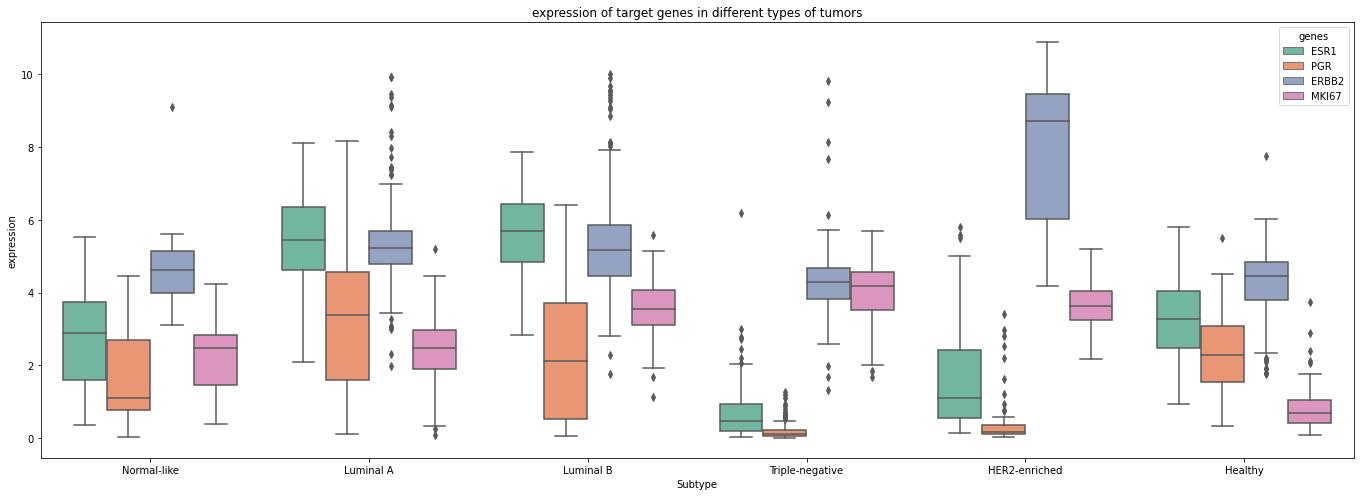

In [13]:
f, axs = plt.subplots(1, figsize=(19,7))

g = sns.boxplot(data = df_melted, x='Subtype', y="expression", hue = 'genes', palette='Set2')
g.set_title('expression of target genes in different types of tumors')
g.set_xticklabels(g.get_xticklabels(),rotation=0)
plt.tight_layout()


### **№5: В файле human_coronavirus_aln_scores.tsv приведена матрица качеств выравниваний геномов 140 человеческих коронавирусов(первые 20 — геномы HCoV-HKU1, следующие 20 — MERS-CoV,далее SARS-CoV-2, HCoV-229E, HCoV-NL63, HCoV-OC43,SARS-CoV). Превратить эту матрицу в матрицу расстояний(придумать как), использовать полученную матрицу для визуализации методом t-SNE (см. аргумент metric="precomputed").Попробовать различные значения перплексии (нужно получить семь кластеров).**


In [14]:
df3 = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/human_coronavirus_aln_scores.tsv',sep='\t', index_col=0)

In [15]:
pip install sklearn

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
df_distance = 1/df3


In [18]:
model = TSNE(metric="precomputed", perplexity=28) # с перплексией около 20-3 выглядит красиво, если больше/меньше -- границы нечеткие
x = model.fit_transform(df_distance)
df_distance[['n1', 'n2']] = x[:, :2]


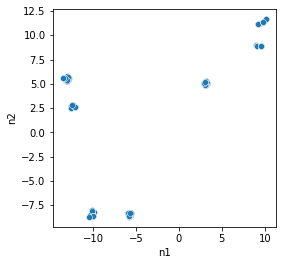

In [19]:
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df_distance, x='n1', y='n2')